<a href="https://colab.research.google.com/github/Starnatvl/sber-autosubscription/blob/main/notebooks/02_data_quality_olga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Соотношение датасетов `ga_sessions.csv` и `ga_hits.csv**`

| Характеристика       | `ga_sessions.csv` (Сессии)               | `ga_hits.csv` (События)                 |
|----------------------|------------------------------------------|------------------------------------------|
| **Уровень данных**   | Сессионный уровень                      | Событийный уровень                      |
| **Описание**         | Одна строка = один визит на сайт        | Одна строка = одно действие в визите    |
| **Ключевые поля**    | `session_id`, `client_id`               | `session_id`, `hit_number`              |
| **Примеры данных**   | UTM-метки, устройство, геолокация       | Просмотры страниц, клики, отправка форм |
| **Роль в анализе**   | Контекст визита (источник, устройство)  | Поведение пользователя на сайте         |
| **Связь**           | Связывается по `session_id`             | Присоединяется к сессиям                |

# 1. Датасет: ga_sessions.csv

Описание: Данные о сессиях пользователей

Тип: CSV

Размер: 370,1 МБ


## **Анализ структуры DataFrame (Сессии)**

| # | Колонка                    | Non-Null Count | % Заполненности | Dtype   | Описание                          | Проблемы              | Рекомендации                     |
|---|----------------------------|----------------|------------------|---------|-----------------------------------|-----------------------|----------------------------------|
| 0 | `session_id`               | 1,860,042      | 100%             | object  | Уникальный ID сессии              | -                     | Ключевое поле для соединения     |
| 1 | `client_id`                | 1,860,042      | 100%             | object  | Анонимный ID пользователя         | -                     | -     |
| 2 | `visit_date`               | 1,860,042      | 100%             | object  | Дата визита                       | Неоптимальный тип     | `pd.to_datetime()`               |
| 3 | `visit_time`               | 1,860,042      | 100%             | object  | Время визита                      | Неоптимальный тип     | Объединить с датой → `datetime`  |
| 4 | `visit_number`             | 1,860,042      | 100%             | int64   | Номер визита пользователя         | -                     | -                                |
| 5 | `utm_source`               | 1,859,945      | 99.99%           | object  | Источник трафика                  | содержат хеши, 97 пропусков           | Запросить корректные данные, или сопоставить хеши вручную, или удалить колонку               |
| 6 | `utm_medium`               | 1,860,042      | 100%             | object  | Тип канала                        | -                     | Выявить "скрытые" пропуски, унифицировать значения           |
| 7 | `utm_campaign`             | 1,640,439      | 88.2%            | object  | Название кампании                 | содержат хеши, 219,603 пропусков     | Запросить корректные данные, или сопоставить хеши вручную, или удалить колонку               |
| 8 | `utm_adcontent`            | 1,524,427      | 82.0%            | object  | Рекламный креатив                 | содержат хеши, 335,615 пропусков     | Запросить корректные данные, или сопоставить хеши вручную, или удалить колонку                  |
| 9 | `utm_keyword`              | 777,981        | 41.8%            | object  | Ключевое слово                    | содержат хеши, 1,082,061 пропусков   | Удалить колонку                  |
|10 | `device_category`          | 1,860,042      | 100%             | object  | Тип устройства                    | -                     | Конвертировать в `category`      |
|11 | `device_os`                | 789,904        | 42.5%            | object  | Операционная система              | 1,070,138 пропусков   | Заполнить "unknown"              |
|12 | `device_brand`             | 1,492,864      | 80.3%            | object  | Производитель устройства          | 367,178 пропусков     | Заполнить "other"                |
|13 | `device_model`             | 16,338         | 0.9%             | object  | Модель устройства                 | 1,843,704 пропусков   | Удалить колонку                  |
|14 | `device_screen_resolution` | 1,860,042      | 100%             | object  | Разрешение экрана                 | -                     | Выделить ширину/высоту           |
|15 | `device_browser`           | 1,860,042      | 100%             | object  | Браузер                           | -                     | Конвертировать в `category`      |
|16 | `geo_country`              | 1,860,042      | 100%             | object  | Страна                            | -                     | Конвертировать в `category`      |
|17 | `geo_city`                 | 1,860,042      | 100%             | object  | Город                             | -                     | Конвертировать в `category`      |

### **Ключевая статистика**
- **Всего сессий**: 1,860,042
- **Объем памяти**: 255.4+ MB
- **Основные проблемы**:
  - `utm_source`, `utm_campaign`, `utm_adcontent`, `utm_keyword`: содержат хэши
  - `device_model`: 99.1% пропусков
  - `device_os`: 57.5% пропусков

In [ ]:
import gdown
import pandas as pd

url_sessions = "https://drive.google.com/uc?export=download&id=1E-OJ1E_ZliOldsRZgJzL844IV7IlCOqW"
output_sessions = "ga_sessions.csv"
gdown.download(url_sessions, output_sessions, quiet=False)

df_sessions = pd.read_csv(output_sessions)



Downloading...
From (original): https://drive.google.com/uc?export=download&id=1E-OJ1E_ZliOldsRZgJzL844IV7IlCOqW
From (redirected): https://drive.google.com/uc?export=download&id=1E-OJ1E_ZliOldsRZgJzL844IV7IlCOqW&confirm=t&uuid=b9668283-967e-4dc4-a205-9ffa63678386
To: /content/ga_sessions.csv
100%|██████████| 388M/388M [00:03<00:00, 118MB/s]
/tmp/ipython-input-1-2348732507.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv(output_sessions)


In [ ]:
df_sessions

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [ ]:
df_sessions.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   session_id                1860042 non-null  object
 1   client_id                 1860042 non-null  object
 2   visit_date                1860042 non-null  object
 3   visit_time                1860042 non-null  object
 4   visit_number              1860042 non-null  int64 
 5   utm_source                1859945 non-null  object
 6   utm_medium                1860042 non-null  object
 7   utm_campaign              1640439 non-null  object
 8   utm_adcontent             1524427 non-null  object
 9   utm_keyword               777981 non-null   object
 10  device_category           1860042 non-null  object
 11  device_os                 789904 non-null   object
 12  device_brand              1492864 non-null  object
 13  device_model              16338 non-null  

In [ ]:
medium_counts = df_sessions['utm_medium'].value_counts(dropna=False)
print(medium_counts)

utm_medium
banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article  

### **Расшифровка значений utm_medium**

| Значение          | Категория               | Описание                                                                 | Пример источника             | Рекомендуемое действие       |
|-------------------|-------------------------|--------------------------------------------------------------------------|-------------------------------|------------------------------|
| `cpc`            | Платный трафик          | Платные клики (контекстная реклама)                                      | Google Ads, Яндекс.Директ     | Оставить как есть            |
| `cpm`            | Платный трафик          | Показная реклама (за 1000 показов)                                       | Рекламные сети, баннеры       | Оставить как есть            |
| `organic`        | Бесплатный трафик       | Органический трафик (без оплаты)                                         | Поисковики, прямые заходы     | Оставить как есть            |
| `referral`       | Бесплатный трафик       | Переходы с других сайтов                                                 | Форумы, партнёрские сайты     | Оставить как есть            |
| `email`          | Маркетинг               | Email-рассылки                                                           | Mailchimp, SendPulse          | Оставить как есть            |
| `(none)`         | Проблемное значение     | Пустое значение или технический сбой                                     | -                             | Заменить на `organic/direct` |
| `(not set)`      | Проблемное значение     | Не задано в UTM-метках                                                   | -                             | Заменить на `direct`         |
| `banner`         | Избыточное значение     | Уточнение для `cpm`                                                      | Баннерные сети                | Объединить с `cpm`           |
| `fb_smm`         | Соцсети                 | Facebook-трафик                                                          | Facebook                      | Объединить с `social`        |
| `google_cpc`     | Дублирующее значение    | Частный случай `cpc`                                                     | Google Ads                    | Объединить с `cpc`           |
| `tg`             | Мессенджеры             | Telegram-трафик                                                          | Telegram                      | Вынести в `messenger`        |
| `sber_app`       | Специфичный источник    | Мобильное приложение Сбера                                               | СберБанк                      | Оставить отдельно            |

In [ ]:
# Унификация значений столбца utm_medium тип привлечения
# Создаем словарь для замены значений на основе таблицы
utm_mapping = {
    # Проблемные значения
    '(none)': 'organic', # Если в данных есть (none) или пустые значения, их часто заменяют на organic? рафик из бесплатных (неоплачиваемых) источников, где пользователь пришел на сайт без рекламного взаимодействия
    '(not set)': 'direct', # Прямой трафик, без разметки

    # Избыточные/дублирующие значения
    'banner': 'cpm',
    'google_cpc': 'cpc',
    'yandex_cpc': 'cpc',
    'fb_smm': 'social',
    'vk_smm': 'social',

    # Специфичные источники
    'tg': 'messenger',
    'sber_app': 'sber_app'  # Оставляем как есть
}

# Применяем замену значений
df_sessions['utm_medium'] = df_sessions['utm_medium'].replace(utm_mapping)

# Группируем редкие значения (менее 0.1% от общего количества)
threshold = len(df_sessions) * 0.001
rare_mediums = df_sessions['utm_medium'].value_counts()[df_sessions['utm_medium'].value_counts() < threshold].index

# Заменяем редкие значения на 'other', кроме специальных категорий
special_categories = ['sber_app']  # Категории, которые не нужно объединять
to_replace = [x for x in rare_mediums if x not in special_categories]
df_sessions['utm_medium'] = df_sessions['utm_medium'].replace(to_replace, 'other')

# Проверяем результат
print("Распределение значений после обработки:")
print(df_sessions['utm_medium'].value_counts(dropna=False))

# Дополнительная проверка
print("\nСтатистика по категориям:")
print(f"Всего уникальных значений: {df_sessions['utm_medium'].nunique()}")
print(f"Процент значений 'other': {100*(df_sessions['utm_medium'] == 'other').mean():.2f}%")

NameError: name 'df_sessions' is not defined

In [ ]:
print(df_sessions['device_category'].unique())
# В столбце device_category содержатся три категории устройств:

#'mobile' (мобильные)

#'tablet' (планшеты)

#'desktop' (десктопы)

['mobile' 'tablet' 'desktop']


## Выявление дубликатов


In [ ]:
dupl_columns = list(df_sessions.columns)

mask = df_sessions.duplicated(subset=dupl_columns)
data_duplicates = df_sessions[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')
display(data_duplicates)

Число найденных дубликатов: 0


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


In [ ]:
# Выборка всех дублированных записей (для анализа)
mask = df_sessions.duplicated(subset=['session_id', 'client_id'], keep=False)
duplicated_rows = df_sessions[mask].sort_values(['session_id', 'client_id'])

print(f'Число найденных дубликатов: {duplicated_rows.shape[0]}')

# Просмотр примеров (первые 5 дубликатов)
print("Примеры дубликатов:")
display(duplicated_rows.head(10))

Число найденных дубликатов: 0
Примеры дубликатов:


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


Дублей по ключу тоже нет.

In [ ]:
!pip install missingno

  ## Анализ пропусков

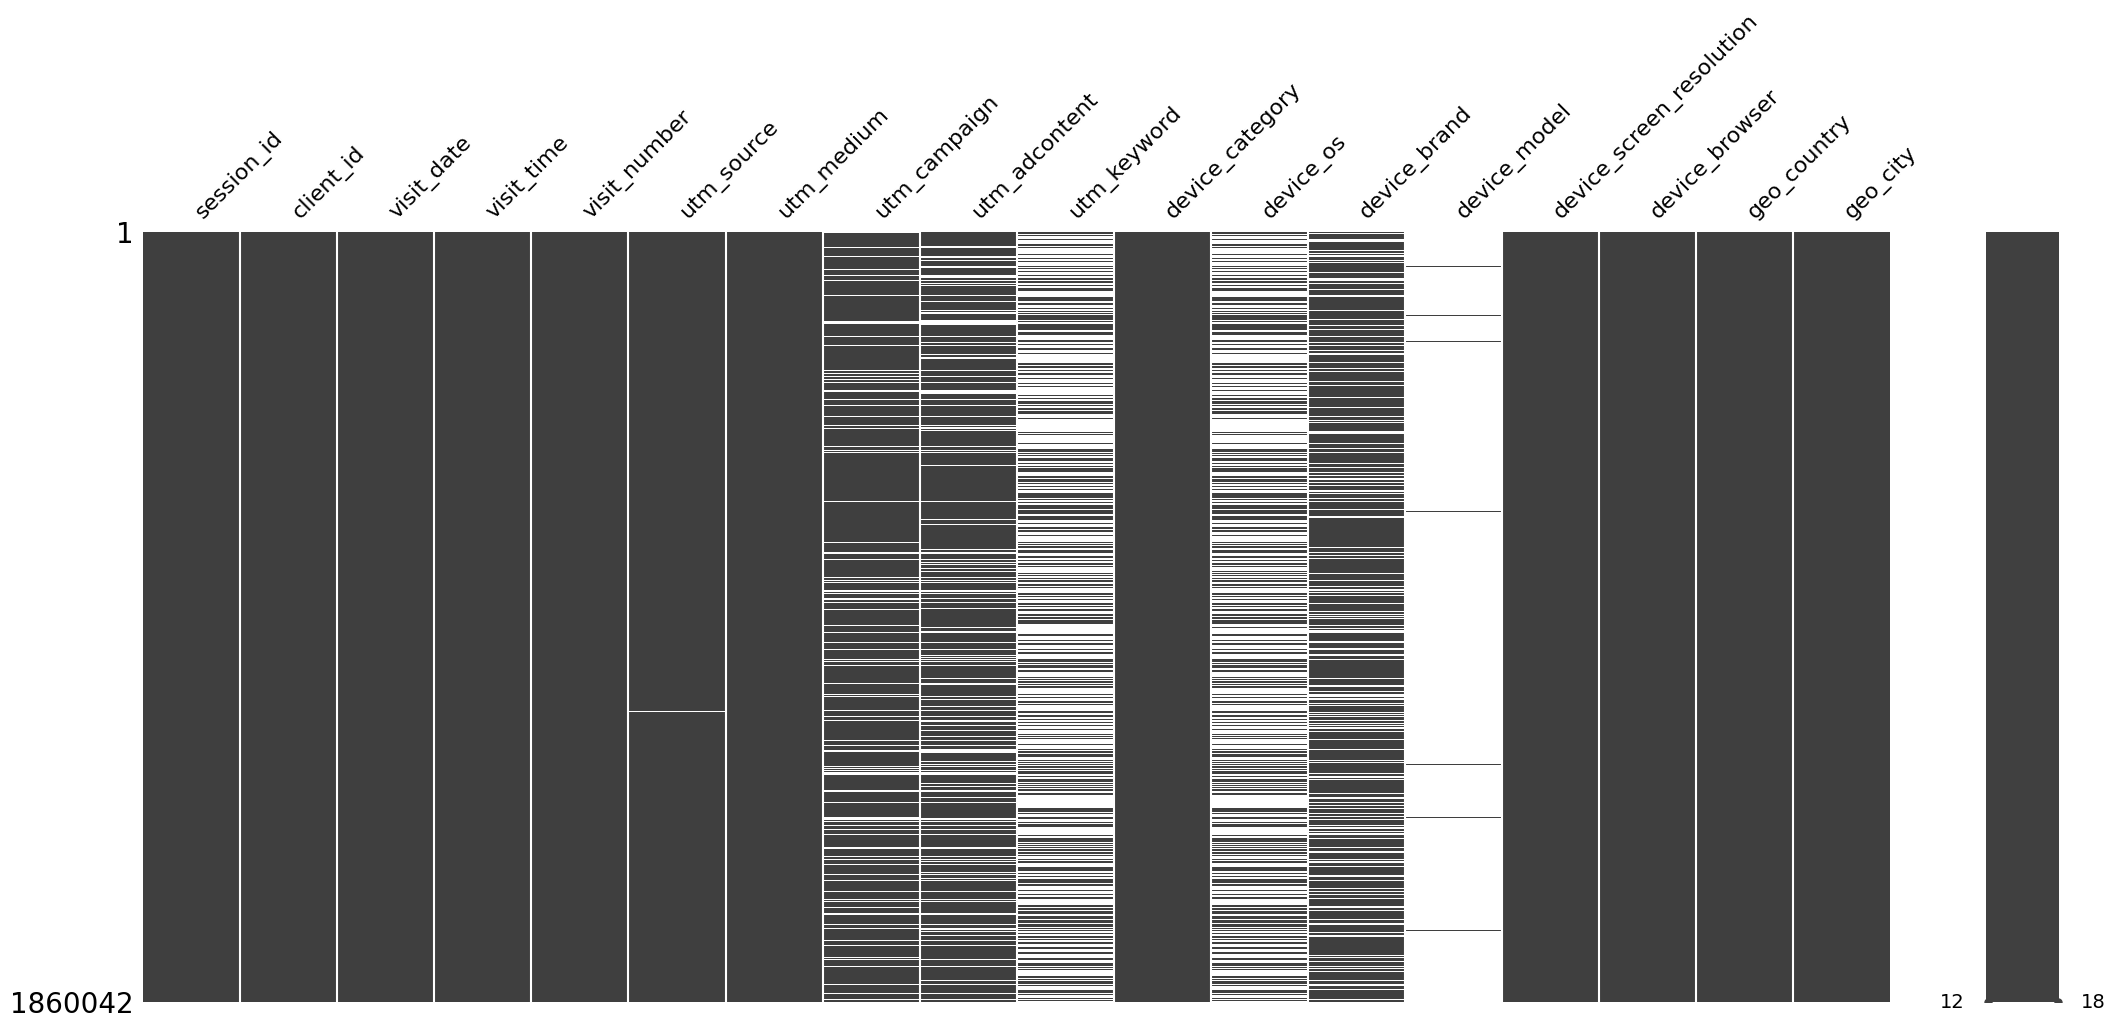

In [ ]:
import missingno
missingno.matrix(df_sessions);

In [ ]:
pd.crosstab(df_sessions['utm_keyword'].isna(), df_sessions['device_os'].isna())

device_os,False,True
utm_keyword,,
False,777981,0
True,11923,1070138


Сильная зависимость пропусков:
когда utm_keyword заполнено → device_os тоже всегда заполнено (0 пропусков в строке utm_keyword=False).

Это значит, что если рекламное ключевое слово известно, то операционная система устройства тоже всегда записана.

*Возможно, что данные об ОС собираются только для трафика с UTM-метками (например, рекламные клики).*

Когда utm_keyword пропущено → device_os чаще всего тоже пропущено (1,070,138 случаев).

Но есть исключения: 11,923 случая, где utm_keyword пропущено, а device_os — нет.

*Возможно, что часть трафика (например, прямой или органический) не имеет UTM-меток, но ОС всё равно фиксируется.*

In [ ]:
pd.crosstab(df_sessions['utm_adcontent'].isna(), df_sessions['device_brand'].isna())

device_brand,False,True
utm_adcontent,,
False,1246503,277924
True,246361,89254


Сильная корреляция пропусков:

* Когда utm_adcontent заполнен, device_brand чаще тоже заполнен (1.2M vs 277K пропусков).
* Но есть исключения: в 246K случаях бренд есть, а рекламный контент отсутствует.

Возможные причины пропусков:

Для device_brand:

  * Пропуски могут быть у дешёвых/неизвестных устройств или при ограниченных данных (например, iOS скрывает бренд).

Для utm_adcontent:

  * Пустые значения характерны для органического трафика или кампаний без детализации.

Рекламные клики (utm_adcontent заполнен):

  * Чаще всего известен и бренд устройства (вероятно, из-за точного трекинга).



In [ ]:
pd.crosstab(df_sessions['utm_keyword'].isna(), df_sessions['utm_adcontent'].isna())

utm_adcontent,False,True
utm_keyword,,
False,680384,97597
True,844043,238018


 58% событий (1,082,061/1,860,042) не содержат UTM-ключевых слов. При этом 72% событий без utm_keyword (844,043/1,082,061) имеют заполненный utm_adcontent, что указывает на неполную разметку рекламных кампаний

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Создаем бинарные колонки для пропусков
df_sessions['is_device_os_missing'] = df_sessions['device_os'].isna().astype(int)
df_sessions['is_device_brand_missing'] = df_sessions['device_brand'].isna().astype(int)
df_sessions['is_device_model_missing'] = df_sessions['device_model'].isna().astype(int)

# Кросс-табуляция пропусков между device_os и device_brand
cross_os_brand = pd.crosstab(
    df_sessions['is_device_os_missing'],
    df_sessions['is_device_brand_missing'],
    margins=True,
    margins_name="Total"
)
print("Пропуски device_os vs device_brand:\n", cross_os_brand)

# Кросс-табуляция пропусков между device_brand и device_model
cross_brand_model = pd.crosstab(
    df_sessions['is_device_brand_missing'],
    df_sessions['is_device_model_missing'],
    margins=True,
    margins_name="Total"
)
print("\nПропуски device_brand vs device_model:\n", cross_brand_model)

Пропуски device_os vs device_brand:
 is_device_brand_missing        0       1    Total
is_device_os_missing                             
0                         671226  118678   789904
1                         821638  248500  1070138
Total                    1492864  367178  1860042

Пропуски device_brand vs device_model:
 is_device_model_missing      0        1    Total
is_device_brand_missing                         
0                        16338  1476526  1492864
1                            0   367178   367178
Total                    16338  1843704  1860042


## Типизация данных (сессии)

In [ ]:
display(df_sessions.head(20))

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow


| Колонка                  | Тип признака      | Подтип          |
|--------------------------|-------------------|-----------------|
| session_id               | категориальный    | номинальный    |
| client_id                | категориальный    | номинальный    |
| visit_date               | дата              |                |
| visit_time               | время             |                |
| visit_number             | категориальный    | порядковый     |
| utm_source               | категориальный    | номинальный    |
| utm_medium               | категориальный    | номинальный    |
| utm_campaign             | категориальный    | номинальный    |
| utm_adcontent            | категориальный    | номинальный    |
| utm_keyword              | категориальный    | номинальный    |
| device_category          | категориальный    | номинальный    |
| device_os                | категориальный    | номинальный    |
| device_brand             | категориальный    | номинальный    |
| device_model             | категориальный    | номинальный    |
| device_screen_resolution | категориальный    | номинальный    |
| device_browser           | категориальный    | номинальный    |
| geo_country              | категориальный    | номинальный    |
| geo_city                 | категориальный    | номинальный    |

# 2. Датасет: ga_hits.csv

Описание: Данные о событиях пользователей

Тип: CSV

Размер: 3,97 ГБ


### **Анализ структуры DataFrame**

| # | Колонка         | Non-Null Count | % Заполненности | Dtype   | Описание                          | Проблемы              | Рекомендации                     |
|---|-----------------|----------------|------------------|---------|-----------------------------------|-----------------------|----------------------------------|
| 0 | `session_id`    | 15,726,470     | 100%             | object  | ID визита              | -                     | -      |
| 1 | `hit_date`      | 15,726,470     | 100%             | object  | Дата события                      | Неоптимальный тип     | `pd.to_datetime()`               |
| 2 | `hit_time`      | 6,566,148      | 41.7%            | float64 | Время события                     | 58.3% пропусков       | Заполнить медианой               |
| 3 | `hit_number`    | 15,726,470     | 100%             | int64   | Порядковый номер события в рамках сессии          | -                     | -                                |
| 4 | `hit_type`      | 15,726,470     | 100%             | object  | Тип события               | Бесполезное хранение данных (одна и таже стркоа "event", нулевая информативность)                     | Удалить столбец    |
| 5 | `hit_referer`   | 9,451,666      | 60%              | object  | Источник события                 | хэши, 40% пропусков         | удалить или запросить корректные данные, или вручную расшифровать     |
| 6 | `hit_page_path` | 15,726,470     | 100%             | object  | URL страницы события                     | -                     | Выделить тип действия, рассмотреть оптимизацию столбца hit_page_path для предсказательной модели (цель Преобразовать сырые URL в признаки (features), которые помогут модели предсказывать целевые действия (оставление заявки, заказ звонка и т.д.).)          |
| 7 | `event_category`| 15,726,470     | 100%             | object  | Категория события                 | Неоптимальный тип данных, разрозненные категории, опечатки                     | Конвертировать в `category`      |
| 8 | `event_action`  | 15,726,470     | 100%             | object  | Действие пользователя             | -                     | Фильтровать ключевые действия, рассматривать, как целевое действие   |
| 9 | `event_label`   | 11,966,286     | 76%              | object  | Тег действия              | хеши, 24% пропусков         | Заполнить "unknown"              |
|10 | `event_value`   | 0              | 0%               | float64 | Числовое значение события         | Полностью пустая      | Удалить колонку                  |

### **Ключевая статистика**
- **Всего строк**: 15,726,470
- **Объем памяти**: 1.3+ GB
- **Основные проблемы**:
  - 58.3% пропусков в `hit_time`
  - Пустая колонка `event_value`
  - хеши, 9,160,322 пропущенных значений в `hit_referer`
  - хеши, пропущенные значения в  в`event_label`

In [ ]:
import gdown
import pandas as pd

url_hits = "https://drive.google.com/uc?export=download&id=1y_014uhvDmD55ZlQ_hC7ptsP9jFecyRd"
output_hits = "ga_hits.csv"
gdown.download(url_hits, output_hits, quiet=False)

df_hits = pd.read_csv(output_hits)



Downloading...
From (original): https://drive.google.com/uc?export=download&id=1y_014uhvDmD55ZlQ_hC7ptsP9jFecyRd
From (redirected): https://drive.google.com/uc?export=download&id=1y_014uhvDmD55ZlQ_hC7ptsP9jFecyRd&confirm=t&uuid=c618b52d-ce8f-4244-b6f7-d5142b661c7f
To: /content/ga_hits.csv
100%|██████████| 4.27G/4.27G [00:38<00:00, 112MB/s]


In [ ]:
df_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


In [ ]:
df_hits.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   session_id      15726470 non-null  object 
 1   hit_date        15726470 non-null  object 
 2   hit_time        6566148 non-null   float64
 3   hit_number      15726470 non-null  int64  
 4   hit_type        15726470 non-null  object 
 5   hit_referer     9451666 non-null   object 
 6   hit_page_path   15726470 non-null  object 
 7   event_category  15726470 non-null  object 
 8   event_action    15726470 non-null  object 
 9   event_label     11966286 non-null  object 
 10  event_value     0 non-null         float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [ ]:
print(df_hits['hit_type'].unique())

['event']


In [ ]:
print(df_hits['hit_referer'].unique())

[nan 'VloVXNWduHeTjUoDkjkO' 'trXmoxcphNjuYcShOXwL' ...
 'SyKCPVqPvVwsypNSfuig' 'KpKtMqJlrvgANamYaRSI' 'tvGabHlPFDvTmIFiCKTL']


In [ ]:
print(df_hits['event_category'].unique())

['quiz' 'card_web' 'sub_page_view' 'search_form' 'auth' 'chat' 'offers'
 'ad_banner' 'navigation' 'profile_menu' 'sub_button_click' 'listing_ads'
 'cars' 'sub_submit' 'main_banners' 'header' 'sap_search_form'
 'active_invitation' 'sap_search__form' 'footer' 'scrolling_main_page'
 'my_idea' 'phone' 'main_services' 'greenday_sub_button_click'
 'greenday_listing_ads' 'greenday_gtm.triggergroup' 'credit_buttons'
 'add_ad_vin' 'add_ad' 'category_tile' 'greenday_sub_submit' 'pos_landing'
 'greenday_sub_page_view' 'add_ad_publish_success' 'add_ad_city'
 'add_ad_description' 'add_ad_additional_information' 'add_ad_photo'
 'wallet' 'add_ad_preview' 'add_ad_form' 'main_advantages'
 'greenday_card_web' 'add_ad_documents' 'credit_landing_pos'
 'add_ad_price' 'add_ad_options' 'jivosite' 'tesla' 'app_banner'
 'titul_form']


| Английский термин       | Русский перевод                 | Пояснение                                      |
|--------------------------|----------------------------------|-----------------------------------------------|
| quiz                     | Опрос                           | Интерактивные опросы на сайте                 |
| card_web                 | Карточка товара (веб)           | Просмотр карточек товаров/услуг               |
| sub_page_view            | Просмотр подстраницы            | Посещение внутренних страниц                  |
| search_form              | Поисковая форма                 | Использование поиска на сайте                 |
| auth                     | Авторизация                     | Вход в аккаунт                                |
| chat                     | Чат                             | Открытие/использование чата                   |
| offers                   | Спецпредложения                 | Просмотр акционных предложений                |
| ad_banner                | Рекламный баннер                | Клики по рекламным баннерам                   |
| navigation               | Навигация                       | Использование меню/переходов                  |
| profile_menu             | Меню профиля                    | Действия в личном кабинете                    |
| sub_button_click         | Клик по кнопке подписки         | Нажатие на кнопки "Подписаться", "Оформить"   |
| listing_ads              | Список объявлений               | Просмотр каталога товаров/услуг               |
| cars                     | Автомобили                      | Раздел автомобилей                            |
| sub_submit               | Отправка формы                  | Заполнение и отправка форм                    |
| main_banners             | Главные баннеры                 | Взаимодействие с основными баннерами          |
| header                   | Шапка сайта                     | Клики по элементам шапки                      |
| sap_search_form          | SAP-поиск                       | Использование корпоративной поисковой системы |
| active_invitation        | Активное приглашение            | Действия по реферальным программам            |
| footer                   | Подвал сайта                    | Взаимодействие с футером                      |
| scrolling_main_page      | Скроллинг главной страницы      | Прокрутка главной страницы                    |
| phone                    | Телефон                         | Клики по номеру телефона                      |
| main_services            | Основные услуги                 | Раздел ключевых услуг                         |
| credit_buttons           | Кредитные кнопки                | Действия с кредитными предложениями           |
| add_ad                   | Добавление объявления           | Создание нового объявления                    |
| category_tile            | Плитки категорий                | Просмотр категорий в виде плиток              |
| pos_landing              | POS-лендинг                     | Посещение страниц POS-кредитования            |
| wallet                   | Кошелек                         | Действия с электронным кошельком              |
| jivosite                 | Jivosite (чат)                  | Использование чат-виджета                     |
| tesla                    | Tesla                           | Раздел, связанный с Tesla                     |
| app_banner               | Баннер приложения               | Реклама мобильного приложения                 |
| titul_form               | Титульная форма                 | Основная форма заявки                         |

In [ ]:
print(df_hits['event_action'].unique())

['quiz_show' 'view_card' 'sub_landing' 'photos_all' 'quiz_start'
 'search_kpp' 'start_auth' 'start_chat' 'go_to_offer' 'name_entered'
 'view_new_card' 'search_color' 'search_drive' 'search_km_to'
 'user_message' 'analystlabel' 'click_on_logo' 'click_on_menu'
 'phone_entered' 'search_engine' 'sub_view_cars_click' 'go_to_car_card'
 'search_form_clear' 'search_km_from' 'view_used_card' 'search_power_to'
 'surname_entered' 'view_more_click' 'showed_number_ads'
 'listing_ads_sort' 'pagination_click' 'phone_auth_start'
 'search_body_type' 'show_phone_input' 'sub_account_page'
 'click_on_get_code' 'search_power_from' 'search_form_region'
 'patronymic_entered' 'sber_id_auth_start' 'sub_submit_success'
 'search_form_rental' 'click_on_yes_its_me' 'search_form_cost_to'
 'search_form_year_to' 'show_sms_code_input' 'sub_car_claim_click'
 'click_on_subscription' 'search_form_cost_from' 'search_form_year_from'
 'search_steering_wheel' 'sub_footer_link_click' 'sub_header_link_click'
 'sub_open_dialog_

Это список событий (действий)

Категоризация действий:
1. Поиск и подбор автомобилей
search_* – различные параметры поиска (цвет, пробег, мощность, тип кузова и т. д.).

search_kpp – поиск по типу КПП (механика/автомат).

search_color – фильтрация по цвету.

search_drive – тип привода (передний, задний, полный).

search_km_to / search_km_from – пробег "до" и "от".

search_power_to / search_power_from – мощность двигателя.

search_body_type – тип кузова.

search_steering_wheel – расположение руля (левый/правый).

search_form_region – выбор региона.

search_form_mark_select / search_form_model_select – выбор марки и модели.

search_form_search_btn – нажатие кнопки "Найти".

search_form_clear – сброс фильтров.

2. Просмотр карточек автомобилей
view_card – просмотр карточки авто.

view_new_card / view_used_card – просмотр новых/б/у авто.

go_to_car_card – переход на карточку авто.

photos_all – просмотр всех фото.

view_more_click – кнопка "Показать ещё".

showed_number_ads – отображение количества объявлений.

listing_ads_sort – сортировка списка объявлений.

3. Личный кабинет и авторизация
start_auth – начало авторизации.

phone_entered – ввод телефона.

code_sms_entered_success – успешный ввод SMS-кода.

phone_auth_success – успешная авторизация по телефону.

sber_id_auth_start – вход через СберID.

click_on_my_data – просмотр своих данных.

click_on_create_new_account – создание нового аккаунта.

4. Чат и коммуникация
start_chat – начало чата.

user_message – отправка сообщения.

click_on_contact_us – контакт с поддержкой.

sub_open_dialog_click – открытие диалога.

chat requested – запрос чата.

chat established – соединение в чате.

proactive invitation shown – показано proactive-приглашение в чат.

5. Оформление заявок и кредитов
go_to_offer – переход к офферу (предложению).

click_on_credit_btn – нажатие на кнопку кредита.

setelem_credit_form_button – кредит от Сетелем.

tinkoff_credit_form_button – кредит от Тинькофф.

click_insurance – страховка.

sub_car_claim_submit_click – отправка заявки на авто.

6. Действия с объявлениями
add_ad_btn – добавление объявления.

success_ad_creation – успешное создание объявления.

click_sell_car – продажа авто.

click_buy_auto – покупка авто.

7. Навигация по сайту/приложению
click_on_logo – клик по логотипу.

click_on_menu – открытие меню.

go_to_privacy_policy – переход к политике конфиденциальности.

go_to_terms – переход к условиям использования.

go_to_support – переход в поддержку.

scrolling_to_* – скролл до определённого раздела.

8. Маркетинговые ивенты
greenday_* – акции Green Day (подарки, скидки).

new_year_road_help_banner_show – показ новогоднего баннера.

potential_banner_show – показ рекламного баннера.

tesla_banner_show – баннер Tesla.

9. Ошибки и системные события
show_captha_error – ошибка капчи.

code_sms_incorrect_in – неверный SMS-код.

code_sms_limit_error – превышен лимит SMS.

sub_submit_error – ошибка отправки формы.

Вывод:
События помогают анализировать поведение пользователей, улучшать UX и увеличивать конверсию.

In [ ]:
print(df_hits['event_label'].unique())

[nan 'GYKKaSmRGxilGoDZiuEJ' 'nsSPWOGBZhTHYKHvcPDM' ...
 'zCMGPrpNkfsTcYWqMUzJ' 'NqyZafHYWtVdMoHFaUMP' 'aNlmojNIfsJaXKZHCDiU']


## Анализ пропусков


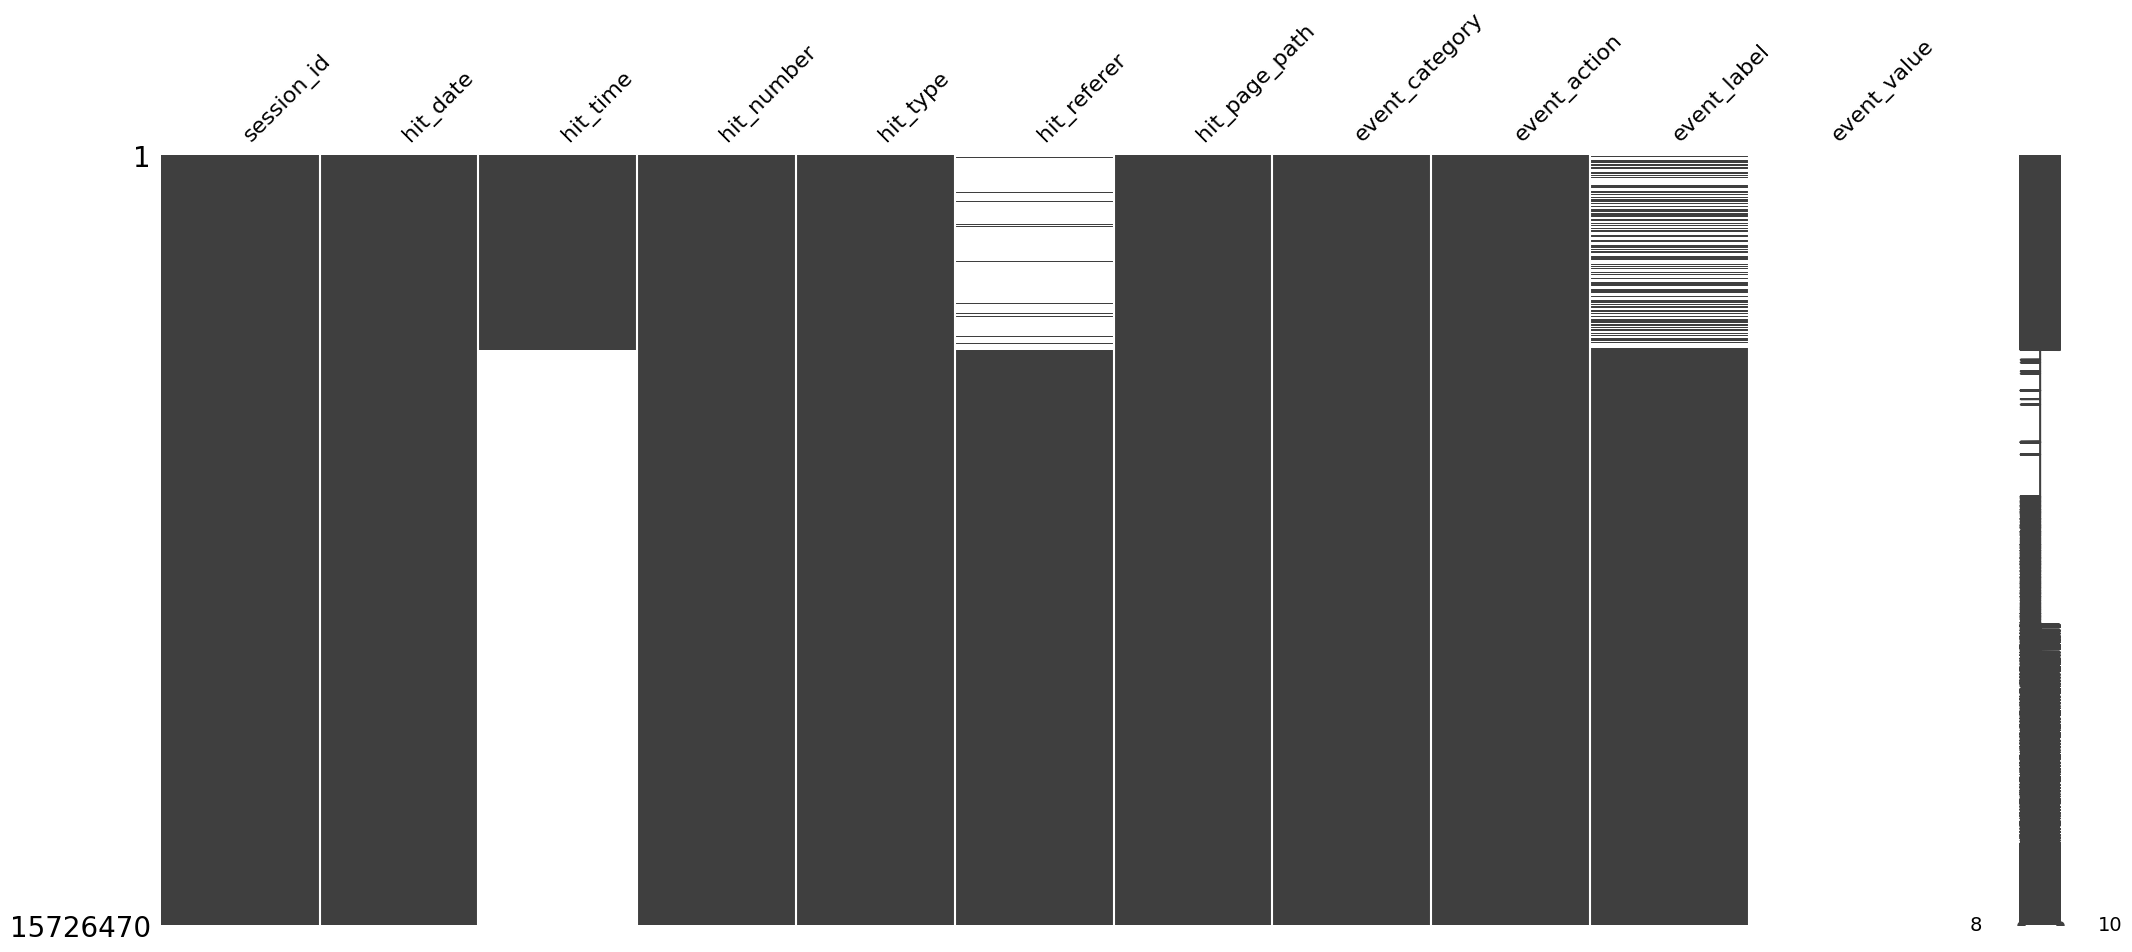

In [ ]:
import missingno
missingno.matrix(df_hits);

In [ ]:
pd.crosstab(df_hits['hit_referer'].isna(), df_hits['event_label'].isna())

event_label,False,True
hit_referer,,
False,9278516,173150
True,2687770,3587034


Когда реферер есть (False):

* event_label заполнен в 98.2% случаев (9,278,516 из 9,451,666)

* Только 1.8% событий (173,150) не имеют метки

Когда реферер отсутствует (True):

* event_label пропущен в 57.2% случаев (3,587,034 из 6,274,804)

* Заполнен только в 42.8% (2,687,770)

--------------------------

Итого: Система корректно размечает 98% внешнего трафика, но теряет метки в 57% случаев для прямых заходов

In [ ]:
pd.crosstab(df_hits['event_label'].isna(), df_hits['event_action'].isna())

event_action,False
event_label,
False,11966286
True,3760184


Выводы:

* Метка (event_label) отсутствует в 3.7M случаев (24%)

* При этом event_action всегда заполнен (как и в предыдущих данных)
---------------------

Итого, возможно:

* Некоторые действия (event_action) не требуют метки

* Возможна системная ошибка для определенных типов действий

In [ ]:
pd.crosstab(df_hits['hit_referer'].isna(), df_hits['hit_page_path'].isna())

hit_page_path,False
hit_referer,
False,9451666
True,6274804


Выводы:
* Все события имеют заполненный hit_page_path (подтверждает 100% заполняемость из предыдущих данных)

* Распределение hit_referer повторяет общую статистику (60% заполнены)

* Важный нюанс: Даже при отсутствии реферера URL страницы всегда известен

In [ ]:
# Анализ по категориям
cross_tab_event_category_event_label = pd.crosstab(df_hits['event_category'], df_hits['event_label'].isna())

cross_tab_event_category_event_label.to_csv('cross_tab_event_category_event_label.csv', encoding='utf-8-sig')
from google.colab import files
files.download('cross_tab_event_category_event_label.csv')  # Скачать в браузер

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



1.Категории с полной заполняемостью (True = 0):

* cars, category_tile, credit_buttons:

  * 0% пропусков

  * Системные или ключевые действия с обязательной разметкой

* add_ad и подкатегории:

  * В среднем 95% заполняемости (кроме add_ad_additional_information - 85%)

Вывод: Для этих событий время фиксируется всегда.

2.Категории с массовыми пропусками (True ≫ False):

* active_invitation:

  * 99.7% пропусков меток (8,450 из 8,478 событий)

  * Возможная причина: технические события без необходимости маркировки

* main_banners:

  * 100% пропусков (14,142 событий)

  * Типично для баннерной рекламы без детализации

* greenday_sub_button_click:

  * 80.4% пропусков (12,398 из 15,425)

Вывод: Возможны технические ограничения или ненужность времени для этих событий.

3.Необычные случаи:

* main_banners: 0 заполнено vs 14142 пропущено (100% пропусков) — возможно, баннеры не требуют времени.

* card_web: 4.8M заполнено vs 2.6M пропущено — крупнейшая категория с частичной заполняемостью.



---



Итого: Пользовательские действия (auth, chat, search_form) демонстрируют:

* Высокую заполняемость (70-90%)

* Исключение: sub_page_view - 60% пропусков

* Технические события (jivosite, main_banners) часто не требуют меток

In [ ]:

pd.crosstab(df_hits['hit_referer'].isna(), df_hits['hit_time'].isna())

hit_time,False,True
hit_referer,,
False,292103,9159563
True,6274045,759


Обнаружена обратная зависимость между пропусками hit_time и hit_referer:

* При наличии реферера время отсутствует в 97% случаев

* При отсутствии реферера время есть в 99.9% случаев

In [ ]:
cross_tab_event_category = pd.crosstab(df_hits['event_category'], df_hits['hit_time'].isna())

cross_tab_event_category.to_csv('cross_tab_results_event_category.csv', encoding='utf-8-sig')
from google.colab import files
files.download('cross_tab_results_event_category.csv')  # Скачать в браузер

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Категории с критически высокими пропусками (доля пропусков >90%):

* active_invitation: 99.7% пропусков (28 из 8,478)

* jivosite: 100% пропусков (88,443 из 88,443)

* add_ad_ (кроме add_ad_form): 75-95% пропусков

Категории с полной заполняемостью (0% пропусков):

* credit_buttons

* greenday_card_web

* greenday_gtm.triggergroup

* greenday_sub_button_click

Основные закономерности:

* Технические события (jivosite, main_banners) чаще не имеют времени

* Пользовательские действия (auth, chat) имеют 30-50% пропусков

* Категория card_web (основная) - 65% пропусков
---
Итого:
* 100% событий jivosite и 99.7% active_invitation не содержат времени

* Ключевые пользовательские действия (card_web, search_form) имеют 55-70% пропусков

In [ ]:
print("Минимальное значение:", df_hits['hit_time'].min())
print("Максимальное значение:", df_hits['hit_time'].max())
print("Примеры значений:", df_hits['hit_time'].dropna().sample(5).values)

Минимальное значение: 0.0
Максимальное значение: 13156885.0
Примеры значений: [168185.  14051.  77167. 776262. 245589.]


Видим, что часы представлены float64, и есть очень странные значения для времени. Мы можем предположить , что тут UNIX-время или продолжительность сессии

In [ ]:
print("Примеры значений:", df_hits['hit_date'].dropna().sample(5).values)

Примеры значений: ['2021-05-26' '2021-11-17' '2021-09-11' '2021-09-07' '2021-12-28']


In [ ]:
df_hits['hour'] = df_hits['hit_time'] % 24  # Нормализуем до 0-23, если число больше 24

# Считаем количество значений, где исходное hit_time > 23
normal_hours = df_hits[df_hits['hit_time'] <= 23]
normal_count = len(normal_hours)
abnormal_hours = df_hits[df_hits['hit_time'] > 23]
abnormal_count = len(abnormal_hours)
unique_abnormal_values = abnormal_hours['hit_time'].unique()

print(f"Количество записей с hit_time <= 23: {normal_count}")
print(f"Количество записей с hit_time > 23: {abnormal_count}")
#print(f"Уникальные аномальные значения: {sorted(unique_abnormal_values)}")

# Создаем DataFrame и сохраняем
pd.DataFrame({'unique_abnormal_values': sorted(unique_abnormal_values)}).to_csv(
    'unique_abnormal_values.csv',
    index=False,
    encoding='utf-8-sig'  # для корректного отображения кириллицы
)

print(f"Сохранено {len(unique_abnormal_values)} уникальных значений в abnormal_hit_times.csv")

Количество записей с hit_time <= 23: 128892
Количество записей с hit_time > 23: 6437256
Сохранено 925863 уникальных значений в abnormal_hit_times.csv


In [ ]:
from google.colab import files
files.download('unique_abnormal_values.csv')  # Скачать в браузер

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Посмотрев файл увидела, что time тут заполнен порядковыми числами. Есть предположение, что это поле было заполнение рандомом или это продолжительность сессии в секундах с начала дня указанного в поле hit_date

In [ ]:
# Если значения в секундах/миллисекундах
import pandas as pd
import numpy as np
"""
df_hits['hour'] = np.select(
    [
        df_hits['hit_time'].isna(),                     # Условие 1: пропуски
        df_hits['hit_time'] > 23.99,                       # Условие 2: аномалии
    ],
    [
        -1,                                            # Значение для пропусков
        -2,                                            # Значение для аномалий
    ],
    default=df_hits['hit_time']                         # Значение по умолчанию (0-23)
)
"""
df_hits['hour'] = np.select(
    [
        df_hits['hit_time'].isna(),            # Пропущенные значения
        df_hits['hit_time'] > 23.99,           # Аномальные значения >23
        df_hits['hit_time'] < 0                # Аномальные значения <0
    ],
    [
        -1,                                    # Код для пропусков
        -2,                                     # Код для >23
        -3                                      # Код для <0
    ],
    default=df_hits['hit_time']  # Нормализуем часы 0-23
)
#df_hits['datetime'] = pd.to_datetime(df_hits['hit_time'], unit='s')  # или unit='ms'
#df_hits['hour'] = df_hits['datetime'].dt.hour

# Заменяем пропуски на -1 и преобразуем в целые часы
#df_hits['hour'] = df_hits['hour'].fillna(-1).apply(lambda x: int(x) if x != -1 else -1)


In [ ]:
print("Минимальное значение:", df_hits['hour'].min())
print("Максимальное значение:", df_hits['hour'].max())
print("Примеры значений:", df_hits['hour'].dropna().sample(5).values)

Минимальное значение: -2.0
Максимальное значение: 23.0
Примеры значений: [-1. -2. -2. -1. -2.]


In [ ]:
# Создаем понятные метки для часов

hour_label = {
    -3: "abnormal (<0h)",
    -2: "abnormal (>23h)",
    -1: "missing",
    **{h: f"{h:02d}:00" for h in range(24)}  # 00:00, 01:00...23:00
}

df_hits['hour_label'] = (
    df_hits['hour']  # Используем уже созданную колонку с -2, -1, 0-23
    .map(hour_label)      # Преобразуем числа в читаемые метки
    .fillna("unknown")     # На случай, если появятся другие аномалии
)

# Шаг 3: Проверяем результат
print("Уникальные метки в данных:")
print(df_hits['hour_label'].value_counts(dropna=False))

Уникальные метки в данных:
hour_label
missing            9160322
abnormal (>23h)    6437256
00:00                41137
01:00                18522
02:00                10101
03:00                 6060
04:00                 4478
09:00                 3512
08:00                 3507
05:00                 3503
10:00                 3502
06:00                 2938
07:00                 2907
11:00                 2858
16:00                 2667
12:00                 2476
15:00                 2348
17:00                 2334
20:00                 2268
13:00                 2243
14:00                 2110
18:00                 2045
19:00                 1906
21:00                 1861
22:00                 1805
23:00                 1804
Name: count, dtype: int64


In [ ]:


cross_tab = pd.crosstab(
        index=df_hits['hour'].map(hour_label),
        columns=df_hits['event_category'],
        margins=True,
        margins_name="Всего"
    )

# Сортируем часы логически (-1, 0, 1...23)
cross_tab = cross_tab.reindex(["missing"] + ["abnormal (>23h)"] + [f"{h}:00" for h in range(24)] + ["Всего"])



In [ ]:
display(cross_tab)

event_category,active_invitation,ad_banner,add_ad,add_ad_additional_information,add_ad_city,add_ad_description,add_ad_documents,add_ad_form,add_ad_options,add_ad_photo,...,sap_search_form,scrolling_main_page,search_form,sub_button_click,sub_page_view,sub_submit,tesla,titul_form,wallet,Всего
hour,,,,,,,,,,,,,,,,,,,,,
missing,28.0,25909.0,606.0,104.0,52.0,39.0,37.0,0.0,55.0,47.0,...,144406.0,10646.0,999487.0,655018.0,1199472.0,10928.0,5.0,0.0,2.0,9160322.0
abnormal (>23h),8338.0,14465.0,143.0,18.0,7.0,9.0,9.0,4.0,7.0,8.0,...,212139.0,1505.0,1420890.0,414138.0,739607.0,7567.0,4.0,1.0,12.0,6437256.0
0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cross_tab.to_csv('cross_tab_results.csv', encoding='utf-8-sig')
from google.colab import files
files.download('cross_tab_results.csv')  # Скачать в браузер

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.Распределение данных
Общее количество событий: 15,726,470

* Пропуски времени (missing): 9,160,322 (58.3%) — критично много, требует исправления в системе сбора

* Аномальные часы (>23h): 6,437,256 (40.9%) — указывает на проблемы формата данных

2.Пиковые активности

Наибольшая активность:

* Категория card_web: 7,456,998 событий (47.4% от общего числа)

* Категория search_form: 2,423,605 (15.4%)

* Категория sub_page_view: 1,986,074 (12.6%)

Временные пики:

* * Большинство данных сконцентрировано в категориях с пропусками и аномалиями

Для нормальных часов активность распределена равномерно без явных всплесков

3.Проблемные места
Категория main_banners:

* Все 14,142 события имеют пропуски времени (missing)

Категория active_invitation:

* 99.7% событий без временной метки

4.Статистические аномалии
Неожиданные нули:

* Часы 0:00–9:00 показывают нули почти во всех категориях

Возможные причины:

* Ночное время низкой активности

* Ошибки в определении времени для этих периодов

---
Количество данных после обработки стало искличительно мало, дальнейшая обработка, без понимания источника ни к чему не приведет.

Количество данных после обработкистло искличительно мало, дальнейшая обработка, без понимания источника ни к чему не приведет.

In [ ]:
# Таблица сопряженности пропусков
pd.crosstab(df_hits['hit_time'].isna(),
            [df_hits['hit_referer'].isna(),
             df_hits['event_label'].isna()])

hit_referer    False            True          
event_label    False   True     False    True 
hit_time                                      
False         118953  173150  2687011  3587034
True         9159563       0      759        0

1.Жёсткая зависимость:

* Когда hit_time пропущен (True), hit_referer почти всегда заполнен (9,159,563 случаев из 9,160,322).

* При этом event_label в таких случаях либо заполнен (9,159,563), либо тоже пропущен (759) — но никогда не пропускается отдельно.

2.Обратная зависимость:

* Если hit_time заполнен (False), пропуск hit_referer автоматически ведёт к пропуску event_label (3,587,034 случаев).

3.Аномалия:

* Всего 759 случаев, где при пропущенном hit_time:

  * hit_referer тоже пропущен

  * но event_label заполнен
---
Итого:
 Данные содержат системную ошибку логирования, а не случайные пропуски. Колонки со временм предлагаю удалить

## Выявление дубликатов


Проверка данных на полный дубль:

In [ ]:
dupl_columns = list(df_hits.columns)

mask = df_hits.duplicated(subset=dupl_columns)
data_duplicates = df_hits[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')
display(data_duplicates)

Число найденных дубликатов: 0


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,hour,hour_label


Посмотрим дубли по ключу

In [ ]:
# Выборка всех дублированных записей (для анализа)
mask = df_hits.duplicated(subset=['session_id', 'hit_number'], keep=False)
duplicated_rows = df_hits[mask].sort_values(['session_id', 'hit_number'])

# Просмотр примеров (первые 5 дубликатов)
print("Примеры дубликатов:")
display(duplicated_rows.head(10))

Примеры дубликатов:


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,hour,hour_label
13161439,1000457743553563495.1632406504.1632406504,2021-09-23,1018.0,3,event,NaN,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_card,NaN,NaN,-2.0,abnormal (>23h)
13612179,1000457743553563495.1632406504.1632406504,2021-09-23,NaN,3,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_card,KclpemfoHstknWHFiLit,NaN,-1.0,missing
10458798,1000457743553563495.1632406504.1632406504,2021-09-23,NaN,4,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_new_card,KclpemfoHstknWHFiLit,NaN,-1.0,missing
11809677,1000457743553563495.1632406504.1632406504,2021-09-23,1040.0,4,event,NaN,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_new_card,NaN,NaN,-2.0,abnormal (>23h)
11359619,1000457743553563495.1632406504.1632406504,2021-09-23,NaN,5,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_card,KclpemfoHstknWHFiLit,NaN,-1.0,missing
12710380,1000457743553563495.1632406504.1632406504,2021-09-23,1043.0,5,event,NaN,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_card,NaN,NaN,-2.0,abnormal (>23h)
13613387,1000457743553563495.1632406504.1632406504,2021-09-23,NaN,6,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_new_card,KclpemfoHstknWHFiLit,NaN,-1.0,missing
14063541,1000457743553563495.1632406504.1632406504,2021-09-23,1045.0,6,event,NaN,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_new_card,NaN,NaN,-2.0,abnormal (>23h)
10458026,1000457743553563495.1632406504.1632406504,2021-09-23,NaN,7,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_card,KclpemfoHstknWHFiLit,NaN,-1.0,missing
11359013,1000457743553563495.1632406504.1632406504,2021-09-23,1092.0,7,event,NaN,sberauto.com/cars/6afb1543?rental_page=rental_car,card_web,view_card,NaN,NaN,-2.0,abnormal (>23h)


Проверка ключа на дубли:

In [ ]:

top_100_duplicates = duplicated_rows.head(100)

# Сохраняем в CSV с русской кодировкой и подписью BOM (для корректного отображения в Excel)
top_100_duplicates.to_csv('duplicated_rows.csv',
                         encoding='utf-8-sig',
                         index=False)          # Без колонки с индексами

print(f"Сохранено {len(top_100_duplicates)} дубликатов в файл duplicated_rows.csv")

from google.colab import files
files.download('duplicated_rows.csv')  # Скачать в браузер

Сохранено 100 дубликатов в файл duplicated_rows.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Попробуем исключить столбец hit_time из списка столбцов для проверки на дубли:

In [ ]:
columns_to_check = [col for col in df_hits.columns if col != 'hit_time']

In [ ]:
# Флаг дубликатов (True для всех копий, включая оригинал)
duplicate_mask = df_hits.duplicated(subset=columns_to_check, keep=False)

# Подсчет дубликатов
num_duplicates = duplicate_mask.sum()
print(f"Найдено полных дубликатов (без учета даты): {num_duplicates}")

Найдено полных дубликатов (без учета даты): 0


Попробуем убрать столбцы 'hit_time', 'hit_referer''

In [ ]:
# Список колонок для исключения
exclude_columns = ['hit_time', 'hit_referer']

# Создание списка колонок для проверки (все кроме исключенных)
columns_to_check_2 = [col for col in df_hits.columns if col not in exclude_columns]

# Альтернативный вариант (более читаемый)
columns_to_check_2 = list(set(df_hits.columns) - set(exclude_columns))
print(columns_to_check_2)

['hit_page_path', 'event_category', 'event_action', 'event_value', 'hit_type', 'event_label', 'session_id', 'hit_number', 'hit_date']


In [ ]:
# Флаг дубликатов (True для всех копий, включая оригинал)
duplicate_mask = df_hits.duplicated(subset=columns_to_check_2, keep=False)

# Подсчет дубликатов
num_duplicates = duplicate_mask.sum()
print(f"Найдено полных дубликатов (без учета даты): {num_duplicates}")

Найдено полных дубликатов (без учета даты): 75508


Предложение : убрать 'hit_time', 'hit_referer'

## Типизация данных (события)

| Колонка          | Тип признака      | Подтип          |
|-------------------|-------------------|-----------------|
| session_id        | категориальные    | номинальный     |
| hit_date          | дата              |                 |
| hit_time          | количественный    | непрерывный     |
| hit_number        | категориальные    | порядковый      |
| hit_type          | категориальные    | номинальный     |
| hit_referer       | категориальные    | номинальный     |
| hit_page_path     | категориальные    | номинальный     |
| event_category    | категориальные    | порядковый      |
| event_action      | категориальные    | порядковый      |
| event_label       | категориальные    | номинальный     |
| event_value       | пусто             |                 |


# Группировка сессий